### Exercise
Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (10)
Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

#### Exploaring the data

In [2]:
iris_data = load_iris()

In [3]:
dir(iris_data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['Species'] = iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name'] = df.Species.apply(lambda x: iris_data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
setosa = df[df.Species == 0]
versicolor = df[df.Species == 1]
virginica = df[df.Species == 2]

In [11]:
setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
versicolor.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
virginica.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


#### visualization

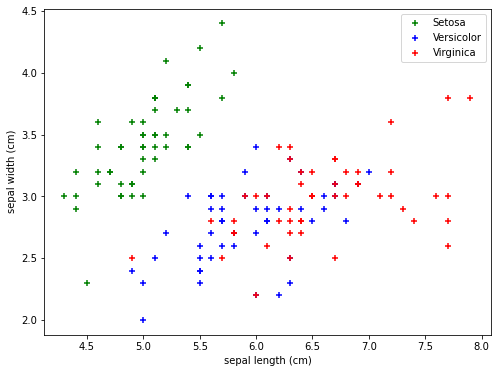

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker='+', c='g', label='Setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], marker='+', c='b', label='Versicolor')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], marker='+', c='r', label='Virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

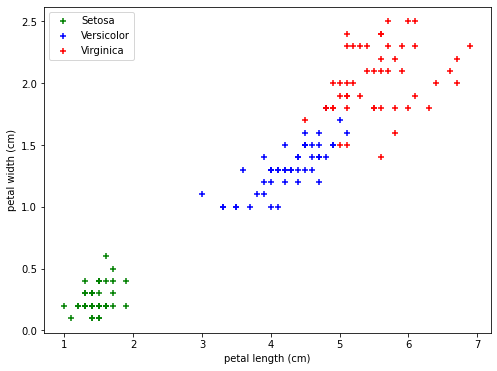

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], marker='+', c='g', label='Setosa')
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], marker='+', c='b', label='Versicolor')
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], marker='+', c='r', label='Virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

#### Assign features and target variables

In [16]:
X = df.drop(['Species', 'flower_name'], axis=1)

In [17]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y = df.Species
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

#### Spliting the data into training and testing data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [27]:
model.score(X_test, y_test)

1.0

with 10 trees it is giving accuracy 100% so there is no need to tune the model by changing number of trees in  RFC 

#### save the model

In [28]:
joblib.dump(model, 'Iris Flower Prediction')

['Iris Flower Prediction']

#### load the model

In [30]:
mj = joblib.load('Iris Flower Prediction')